# **Machine Learning Specialist Interview Study Notebook (Enhanced with Concept Clarifications)**


### **Overview**
This notebook helps you revise essential **Machine Learning** concepts for your upcoming **ML Specialist interview**.  
It includes clear Markdown explanations, conceptual clarifications for challenging areas, and Python code scaffolding for hands-on understanding.

## **1. Setup and Imports**

In this section, we import the common Python libraries used for Machine Learning experiments.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, log_loss, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


## **2. Non-Parametric Models Practice: KNN vs Decision Tree**

**Concept:**  
Non-parametric models do **not assume a predefined mathematical function** for relationships between inputs and outputs.  
They adapt to data patterns naturally but **require larger datasets** to generalize well.  
The more complex or flexible a model is, the more data it needs to avoid **memorizing noise** (overfitting).

**Example analogy:**  
Imagine trying to learn handwriting styles. If you see only one or two examples, you can’t generalize the pattern — you need **many examples** to understand different ways people write the same letter.

In [2]:
# Create a simple synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.linspace(0, 10, 100),
    'Feature2': np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.2, 100),
})
data['Target'] = (data['Feature2'] > 0).astype(int)

# Split dataset
X = data[['Feature1', 'Feature2']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Train Decision Tree model
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.3f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_pred):.3f}")

KNN Accuracy: 0.967
Decision Tree Accuracy: 1.000


**Try it yourself:**  
- Change `n_neighbors` in KNN (try 1, 3, 7) and observe accuracy.  
- Change `max_depth` in Decision Tree and see when it starts to overfit.

## **3. Cross-Entropy (Log Loss) Understanding**

**Concept:**  
Cross-Entropy (or Log Loss) measures how confident your classification model is when making predictions.  
It **penalizes incorrect predictions more strongly when the model is overconfident**.  
A prediction of 0.95 for a class that turns out to be wrong hurts much more than predicting 0.55.

**Intuition:**  
Think of it like being "too sure" — the more certain your wrong guess, the bigger the loss.


In [3]:
y_true = np.array([1, 0, 1, 1, 0])
y_pred_prob = np.array([0.9, 0.2, 0.8, 0.4, 0.1])

loss = log_loss(y_true, y_pred_prob)
print(f"Cross-Entropy Loss: {loss:.4f}")

Cross-Entropy Loss: 0.3147


**Exercise:** Modify `y_pred_prob` to include a high-confidence mistake (e.g., change 0.1 → 0.95) and notice how much the loss increases.

## **4. Model Evaluation: MSE vs MAE and Classification Metrics**

**Concept:**  
Regression tasks often use **MSE** (Mean Squared Error) and **MAE** (Mean Absolute Error).  
However, in **classification problems**, metrics like **Precision**, **Recall**, and **F1-score** give a more realistic view — especially when one class dominates the dataset.

**Simple Explanation:**  
- **Precision:** Of the predictions you made as “positive,” how many were correct?  
- **Recall:** Of all actual “positives,” how many did you catch?  
- **F1-score:** A balance between Precision and Recall.

In [4]:
# Example: Regression Evaluation
np.random.seed(0)
X_reg = np.linspace(0, 10, 50)
y_reg = 3*X_reg + np.random.normal(0, 2, 50)

X_train, X_test, y_train, y_test = train_test_split(X_reg.reshape(-1, 1), y_reg, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")

MSE: 3.492
MAE: 1.524


**Extra Example for Classification Metrics:**

In [5]:
y_true = [1,0,0,0,1,0,0,0,1,0]
y_pred = [1,0,0,0,0,0,0,0,1,0]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 1.00, Recall: 0.67, F1-Score: 0.80


## **5. Bias-Variance Tradeoff Visualization**

**Concept:**  
A machine learning model must balance **bias** (how simple it is) and **variance** (how sensitive it is to training data).  

- **High Bias:** The model is too simple — misses patterns (underfitting).  
- **High Variance:** The model is too complex — memorizes noise (overfitting).  
- **Goal:** Find the sweet spot where the model generalizes well.

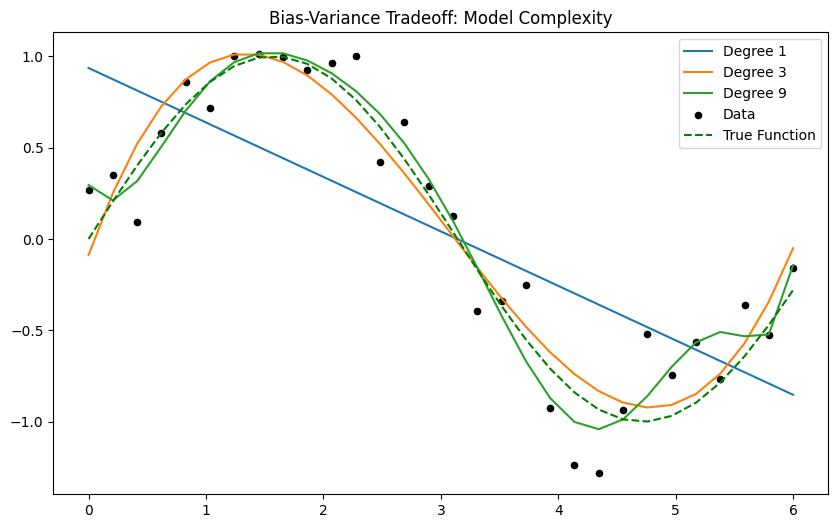

In [6]:
def plot_bias_variance_demo():
    np.random.seed(10)
    X = np.linspace(0, 6, 30)
    y_true = np.sin(X)
    y_noisy = y_true + np.random.normal(0, 0.2, X.shape)

    plt.figure(figsize=(10, 6))
    degrees = [1, 3, 9]
    for d in degrees:
        coeffs = np.polyfit(X, y_noisy, d)
        y_pred = np.polyval(coeffs, X)
        plt.plot(X, y_pred, label=f'Degree {d}')

    plt.scatter(X, y_noisy, color='black', s=20, label='Data')
    plt.plot(X, y_true, 'g--', label='True Function')
    plt.title('Bias-Variance Tradeoff: Model Complexity')
    plt.legend()
    plt.show()

plot_bias_variance_demo()

**Reflection:**  
- Degree 1 → High bias, low variance (too simple).  
- Degree 9 → Low bias, high variance (too complex).  
- The middle degree provides **balanced learning**.

## **6. Self-Practice Tasks**

Try the following hands-on challenges to reinforce understanding:

1. Adjust `K` in KNN and see how model flexibility changes accuracy.  
2. Increase `max_depth` in Decision Trees and visualize when overfitting starts.  
3. Add noise to regression targets and compare how MSE and MAE react.  
4. Compute **Precision, Recall, and F1-score** for your models.  
5. Experiment with polynomial degrees (1–12) in bias-variance visualization.

---
### **Final Notes**
- Non-parametric models = more flexible → need more data.  
- Cross-Entropy = punishes overconfident wrong predictions.  
- Precision/Recall/F1 = better than accuracy for imbalanced datasets.  
- Bias–Variance = simplicity vs. complexity balance.
